In [1]:
import numpy as np
from tdmq.client import Client

INFO:tdmq.client.client:Logging is active.


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

INFO:matplotlib.font_manager:generated new fontManager


In [3]:
c = Client()

In [4]:
srcs = c.get_sources({'id': "dpc/meteo-temp-mosaic/v0"})
assert len(srcs) > 0
s = srcs[0]

In [5]:
ts = s.timeseries()

In [7]:
(time, data) = ts[4]

In [12]:
temp = data['TEMP'] * (data['TEMP'] > -9000.0)

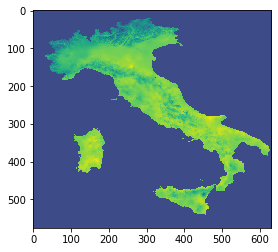

In [13]:
plt.imshow(temp)

In [14]:
(_, sardinia) = ts[4, 300:440, 100:200]

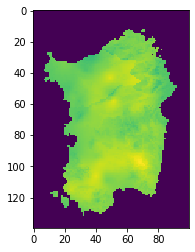

In [15]:
plt.imshow(sardinia['TEMP'] * (sardinia['TEMP'] > -9000.0))

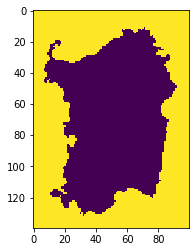

In [37]:
sea = sardinia['TEMP'] == 0
plt.imshow(sea)

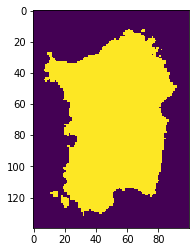

In [38]:
land = sardinia['TEMP'] > 0
plt.imshow(land)

In [57]:
(time, data) = ts[:, 300:440, 100:200]

In [58]:
temp = data['TEMP'] * (data['TEMP'] > -9000)

In [59]:
max_temp = temp.reshape(len(time), -1).max(axis=1)
min_temp = (temp + 200 * (temp == 0.0)).reshape(len(time), -1).min(axis=1)

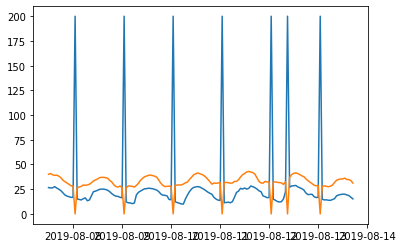

In [60]:
plt.plot(time, np.stack([min_temp, max_temp], axis=1))

In [61]:
good_frames_selector = temp.reshape(len(time), -1).max(axis=1) > 0

In [64]:
good_time = time[good_frames_selector]
good_temp = temp[good_frames_selector]

In [67]:
max_temp = good_temp.reshape(len(good_time), -1).max(axis=1)
min_temp = (good_temp + 200 * (good_temp == 0.0)).reshape(len(good_time), -1).min(axis=1)

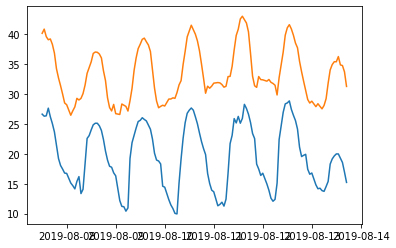

In [68]:
plt.plot(good_time, np.stack([min_temp, max_temp], axis=1))